In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report



In [3]:
df=pd.read_csv('/content/IT_customer_churn.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [6]:
df.duplicated().sum()

22

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894
std,0.368947,24.534965,30.069001
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [9]:
df.Churn.value_counts()

,count
Churn,
No,5164
Yes,1857


<Axes: xlabel='Churn', ylabel='count'>

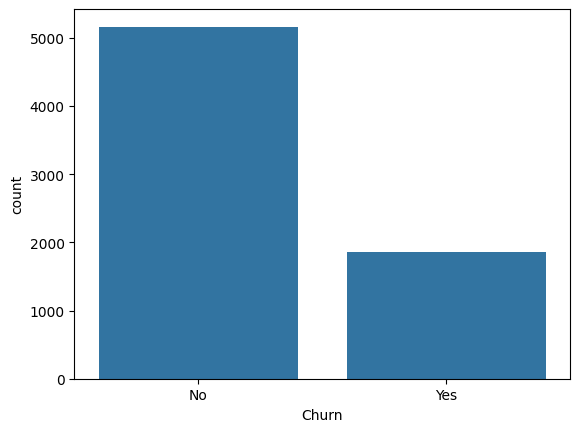

In [10]:
sns.countplot(x='Churn',data=df)

<Axes: xlabel='Contract', ylabel='count'>

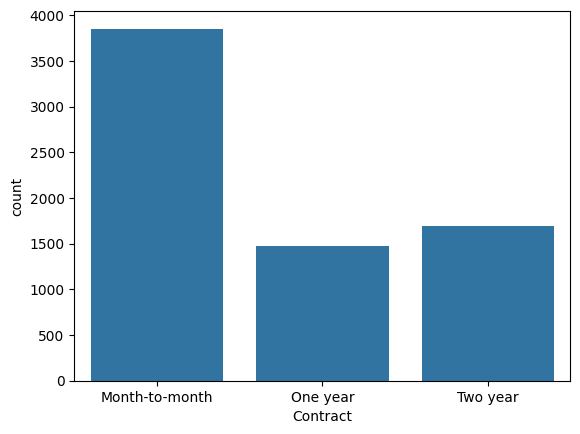

In [11]:
sns.countplot(x='Contract',data=df)

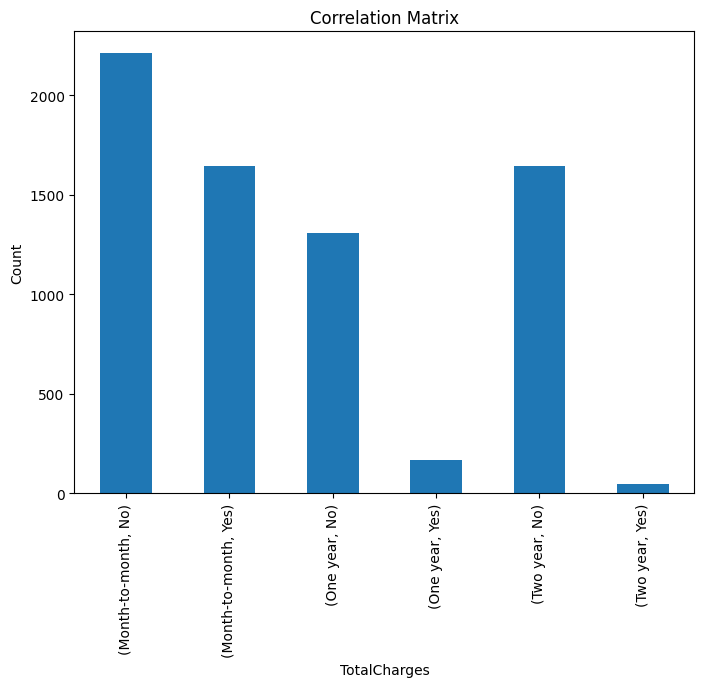

In [12]:
plt.figure(figsize=(8,6))
df.groupby('Contract').Churn.value_counts().plot(kind='bar',stacked=True)
plt.title('Correlation Matrix')
plt.xlabel('TotalCharges')
plt.ylabel('Count')
plt.show()

In [13]:
df = df.drop(['StreamingTV','StreamingMovies'], axis=1)

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


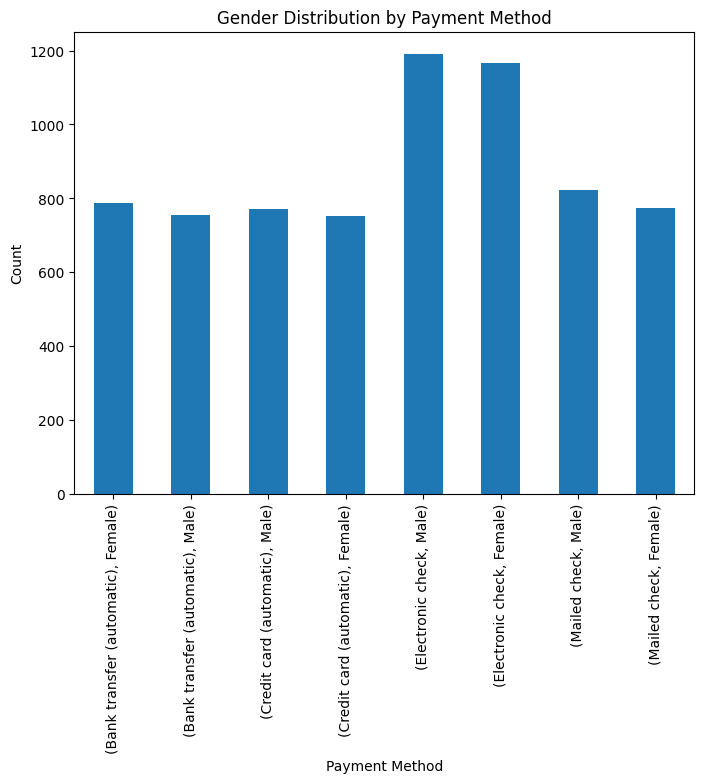

In [15]:
plt.figure(figsize=(8,6))
df.groupby('PaymentMethod')['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

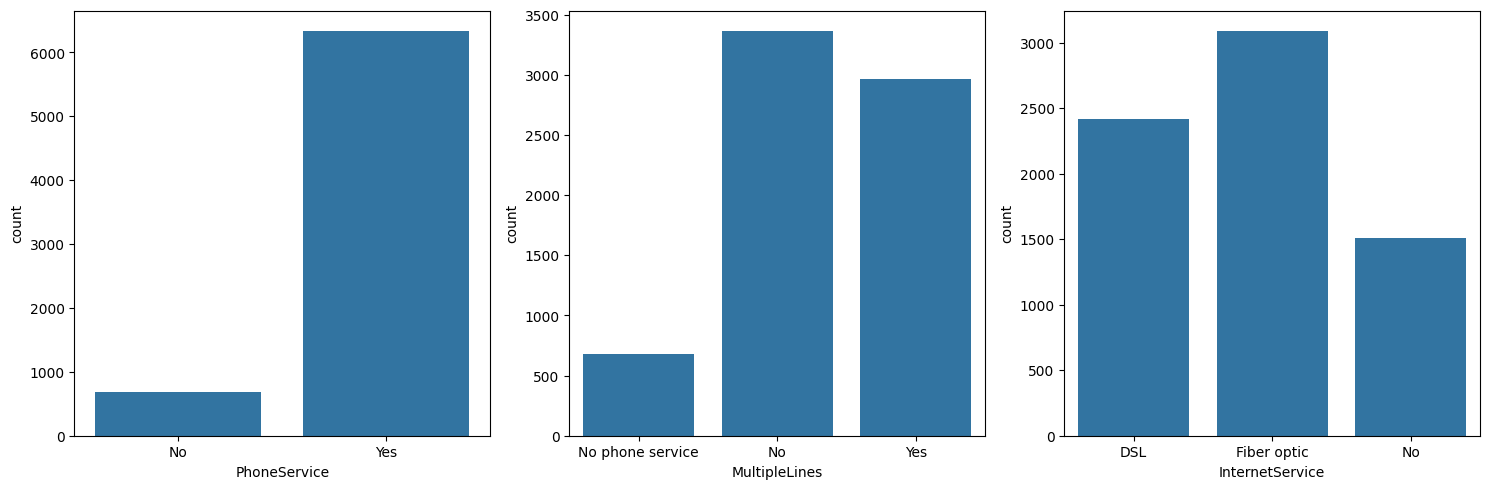

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='PhoneService', data=df, ax=axes[0])
sns.countplot(x='MultipleLines', data=df, ax=axes[1])
sns.countplot(x='InternetService', data=df, ax=axes[2])

plt.tight_layout()
plt.show()

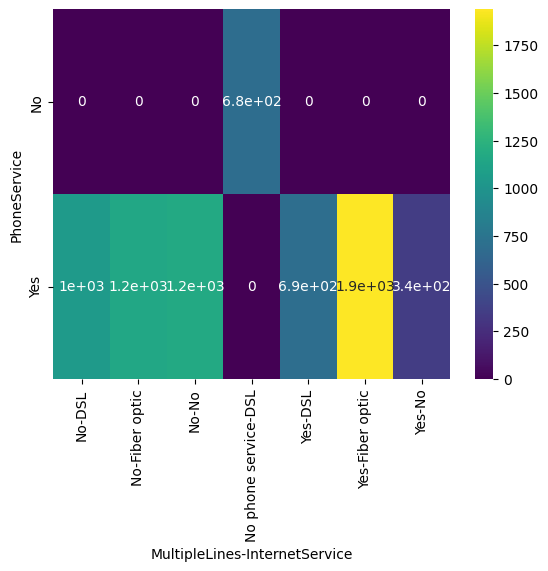

In [17]:
services = pd.crosstab(df['PhoneService'], [df['MultipleLines'], df['InternetService']])
sns.heatmap(services, annot=True, cmap='viridis')
plt.show()

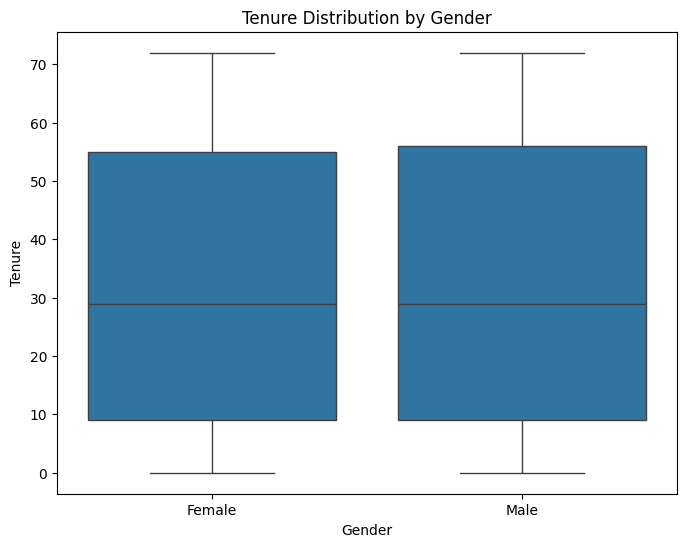

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='tenure', data=df)
plt.title('Tenure Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Tenure')
plt.show()

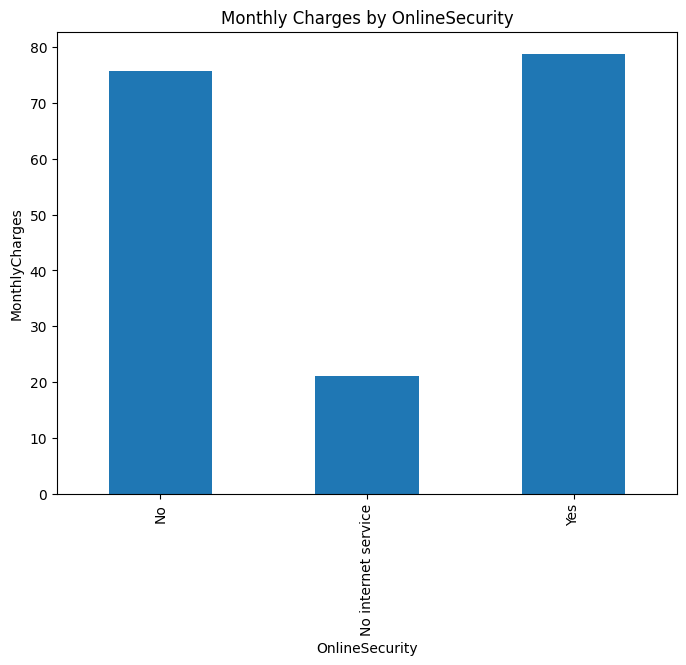

In [19]:
plt.figure(figsize=(8, 6))
df.groupby('OnlineSecurity')['MonthlyCharges'].mean().plot(kind='bar')
plt.title('Monthly Charges by OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.ylabel('MonthlyCharges')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

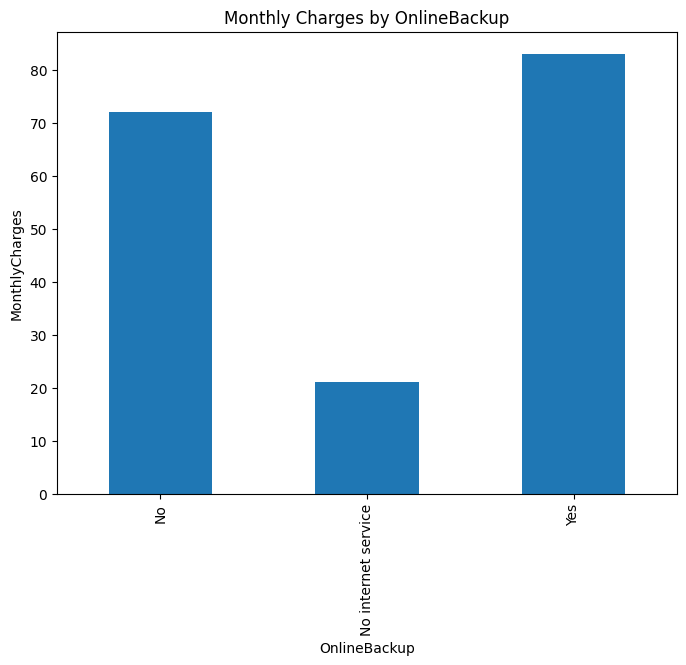

In [20]:
plt.figure(figsize=(8, 6))
df.groupby('OnlineBackup')['MonthlyCharges'].mean().plot(kind='bar')
plt.title('Monthly Charges by OnlineBackup')
plt.xlabel('OnlineBackup')
plt.ylabel('MonthlyCharges')
plt.show

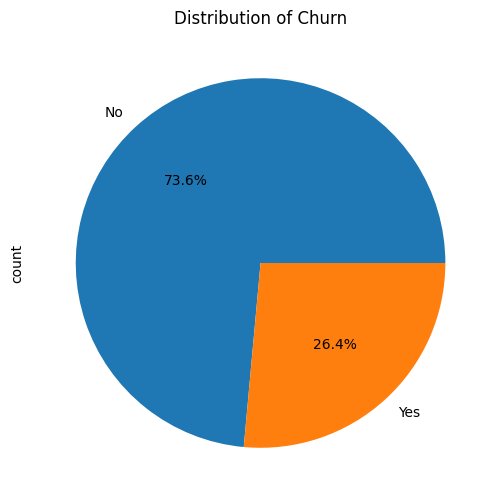

In [33]:
plt.figure(figsize=(8, 6))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Churn')
plt.show()

In [34]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [35]:
df.dropna(subset=['TotalCharges'], inplace=True)

<Axes: xlabel='Churn', ylabel='count'>

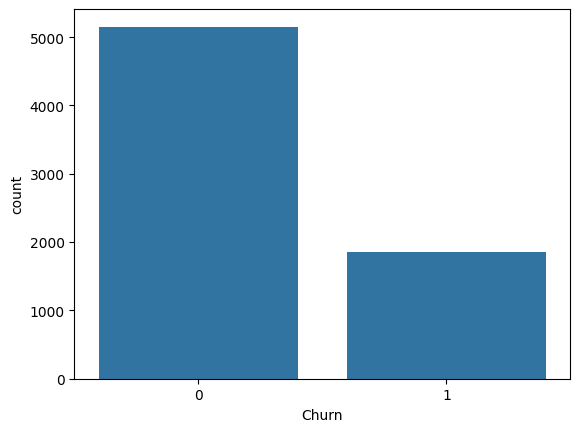

In [36]:
df['Churn']=df.Churn.map({'Yes':1,'No':0})
sns.countplot(x='Churn',data=df)

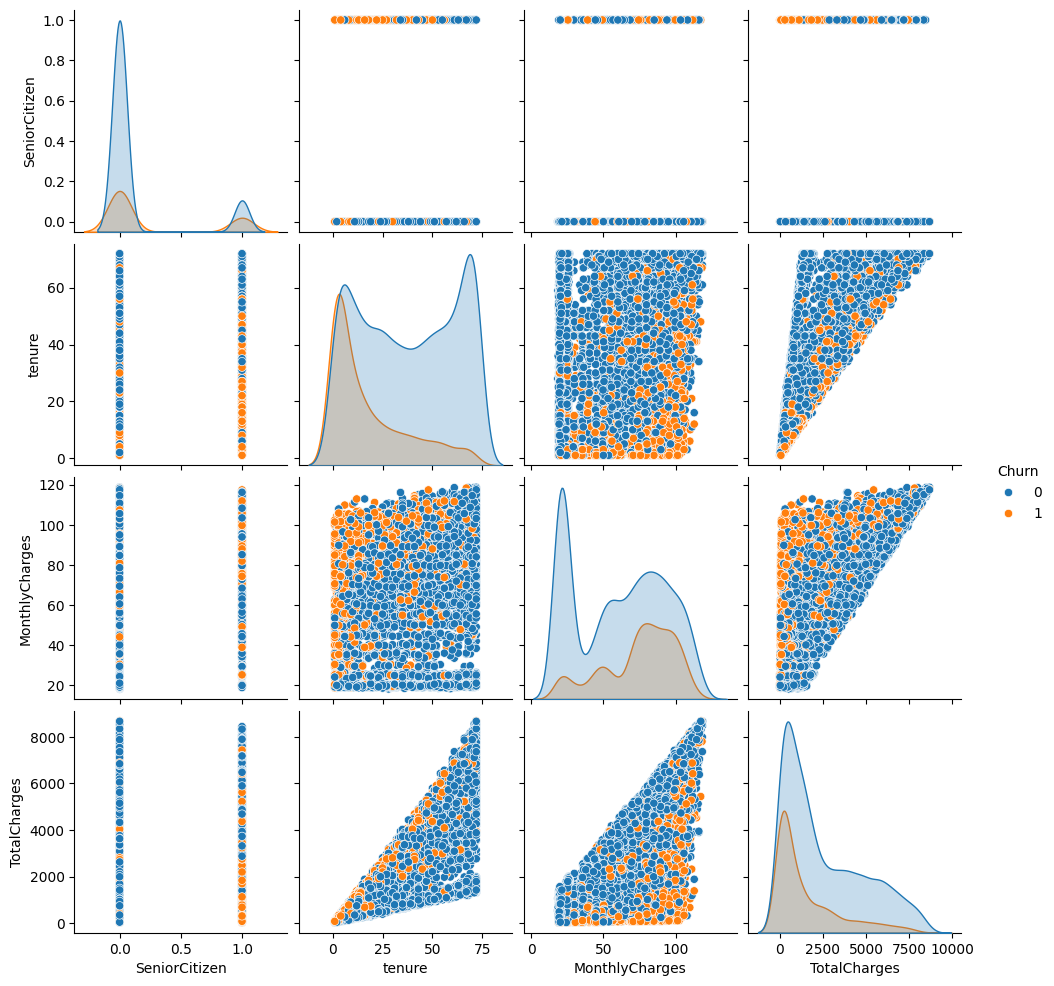

In [37]:
sns.pairplot(df,hue='Churn')

In [44]:
arr=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','PaperlessBilling','PaymentMethod','Churn']
for col in arr:
  df[col]=LabelEncoder().fit_transform(df[col])







In [42]:
df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,1,3,74.40,306.60,1


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   int64  
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   int64  
 3   Dependents        7010 non-null   int64  
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   int64  
 6   MultipleLines     7010 non-null   int64  
 7   InternetService   7010 non-null   int64  
 8   OnlineSecurity    7010 non-null   int64  
 9   OnlineBackup      7010 non-null   int64  
 10  DeviceProtection  7010 non-null   int64  
 11  TechSupport       7010 non-null   int64  
 12  Contract          7010 non-null   int64  
 13  PaperlessBilling  7010 non-null   int64  
 14  PaymentMethod     7010 non-null   int64  
 15  MonthlyCharges    7010 non-null   float64
 16  TotalCharges      7010 non-null   float64
 17  

In [45]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [50]:

y_pred =log_reg.predict(x_test)

In [51]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
y.info()

<class 'pandas.core.series.Series'>
Index: 7010 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7010 non-null   int64
dtypes: int64(1)
memory usage: 109.5 KB


In [53]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)


In [54]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8152639087018545
Precision: 0.5993589743589743
Recall: 0.5825545171339563
F1 Score: 0.5908372827804107


In [56]:
result = pd.DataFrame({'Metrics':['Accuracy','Precision','Recall','F1 Score'],'Values':[accuracy,precision,recall,f1]})
print(result)

     Metrics    Values
0   Accuracy  0.815264
1  Precision  0.599359
2     Recall  0.582555
3   F1 Score  0.590837


In [57]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[956 125]
 [134 187]]


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1081
           1       0.60      0.58      0.59       321

    accuracy                           0.82      1402
   macro avg       0.74      0.73      0.74      1402
weighted avg       0.81      0.82      0.81      1402

